In [5]:
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers
from imblearn.over_sampling import RandomOverSampler

In [6]:
df = pd.read_csv('SPAM.csv', sep=',', header=0)

Let's look at the shape of the of the data frame.

In [7]:
df.head()

,spam,testid,make,address,all,3d,our,over,remove,internet,...,conference,ch;,ch(,ch[,ch!,ch$,ch#,crl.ave,crl.long,crl.tot
0,True,True,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,...,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278
1,True,False,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,...,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028
2,True,True,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,...,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259
3,True,False,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,...,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191
4,True,False,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,...,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191


In [8]:
test = df[df["testid"]==True]
train = df.drop(test.index)

In [9]:
y_train = train[train.columns[0]].values
x_train = train[train.columns[2:]].values

In [10]:
over = RandomOverSampler()
x_train, y_train = over.fit_resample(x_train,y_train)

In [11]:
y_test = test[test.columns[0]].values
x_test = test[test.columns[2:]].values
# print(x_train.shape)
#x_train, x_valid, y_train, y_valid = train_test_split(x_train,y_train,test_size = 0.1,random_state = 0)

In [12]:
scaler = StandardScaler()
x_tra_tr = scaler.fit_transform(x_train)
x_tra_te = scaler.fit_transform(x_test)

In [13]:
encoder = LabelEncoder()
encoder.fit(y_train)
y_tr = encoder.transform(y_train)
# print(y_tr)
encoder.fit(y_test)
y_te = encoder.transform(y_test)

In [14]:
model = tf.keras.Sequential([
  layers.Dense(256, activation='relu'),
  layers.Dropout(.4),
  layers.Dense(128, activation='relu'),
  layers.Dropout(.3),
  layers.Dense(1, activation = "sigmoid")
])

In [15]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
              loss = tf.keras.losses.binary_crossentropy,
              metrics=['accuracy'])

In [16]:
model.fit(x_tra_tr,y_train,epochs=500,verbose = 0)

In [13]:
model.evaluate(x_tra_tr,  y_tr, verbose = 1)

116/116 [==============================] - 0s 655us/step - loss: 0.0085 - accuracy: 0.9970


[0.008481251075863838, 0.9970222115516663]

In [14]:
model.evaluate(x_tra_te,  y_te, verbose = 1)

48/48 [==============================] - 0s 707us/step - loss: 1.0665 - accuracy: 0.9342


[1.0665172338485718, 0.9342448115348816]

In [41]:
from tensorflow.keras.utils import plot_model
from tensorflow.keras.utils import model_to_dot
import pydot
import graphviz

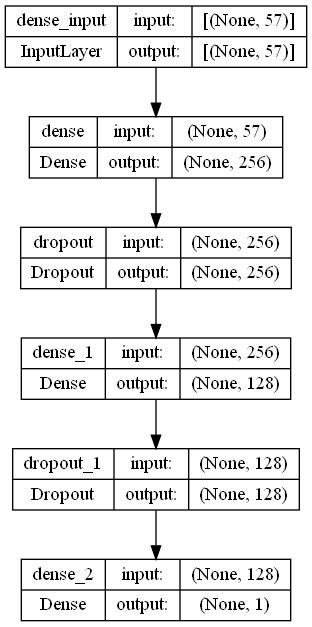

In [42]:
plot_model(model, to_file = "nnet part.png", show_shapes = True)

In [46]:
from ann_visualizer.visualize import ann_viz
import graphviz
import os
os.environ["PATH"] += os.pathsep + 'C:/Users/yangs/anaconda3/Lib/site-packages/graphviz/bin/'

In [55]:
ann_viz(model, title="My neural network",view = True)

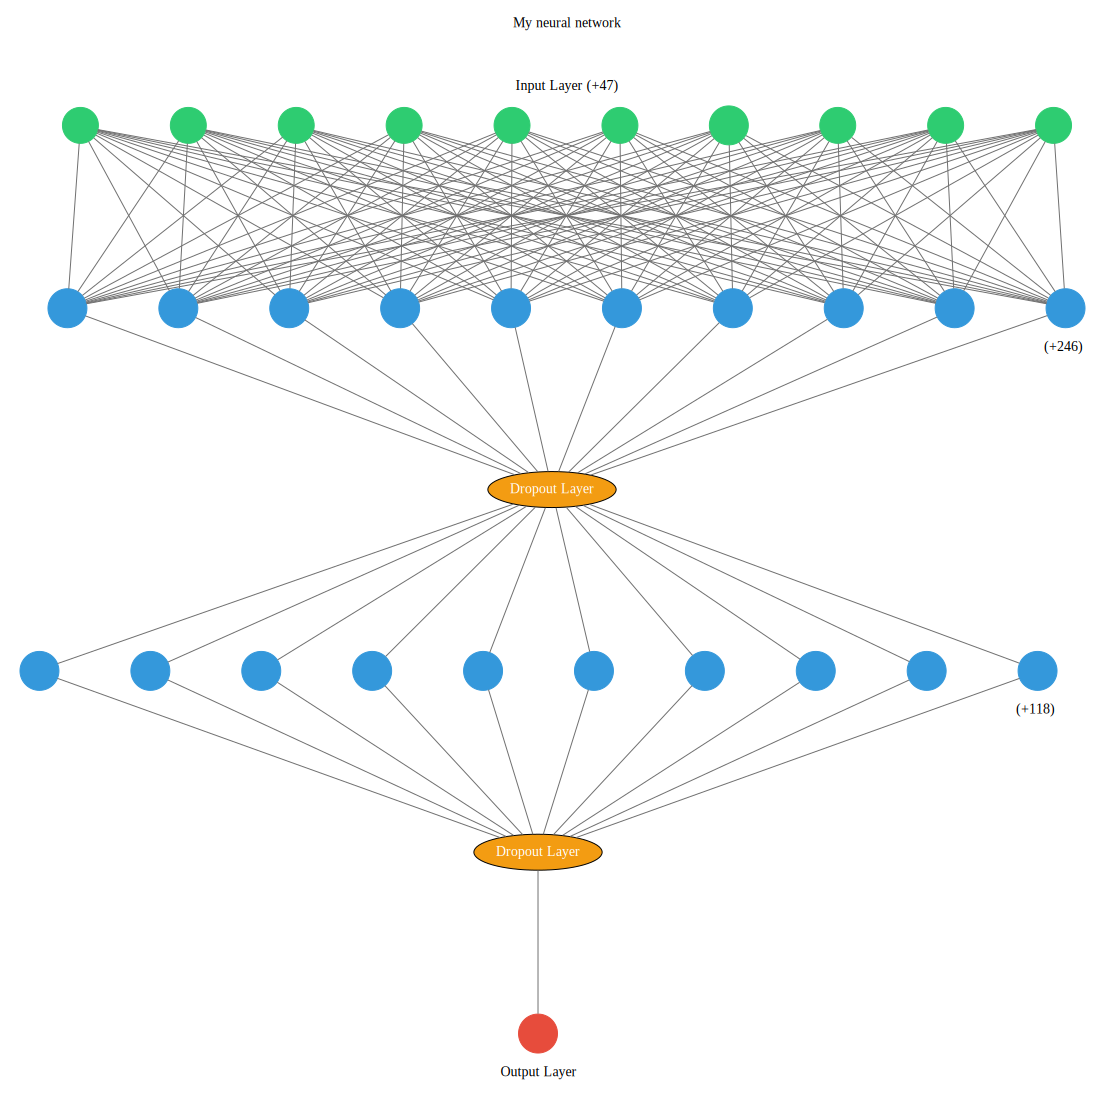

In [54]:
graph = graphviz.Source.from_file("network.gv")
graph